In [1]:
#Created by Vaibhav Mehta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
dataset= pd.read_csv('weather.csv')
print(dataset.shape)

(366, 22)


In [16]:
print(dataset.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

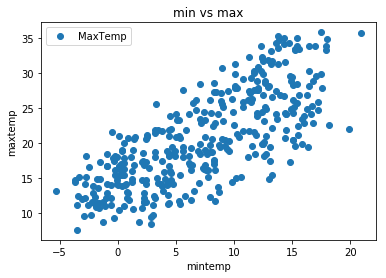

In [17]:
dataset.plot(x='MinTemp', y='MaxTemp' , style='o')
plt.title('min vs max')
plt.xlabel('mintemp')
plt.ylabel('maxtemp')
plt.show()

C:\Users\vaibh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


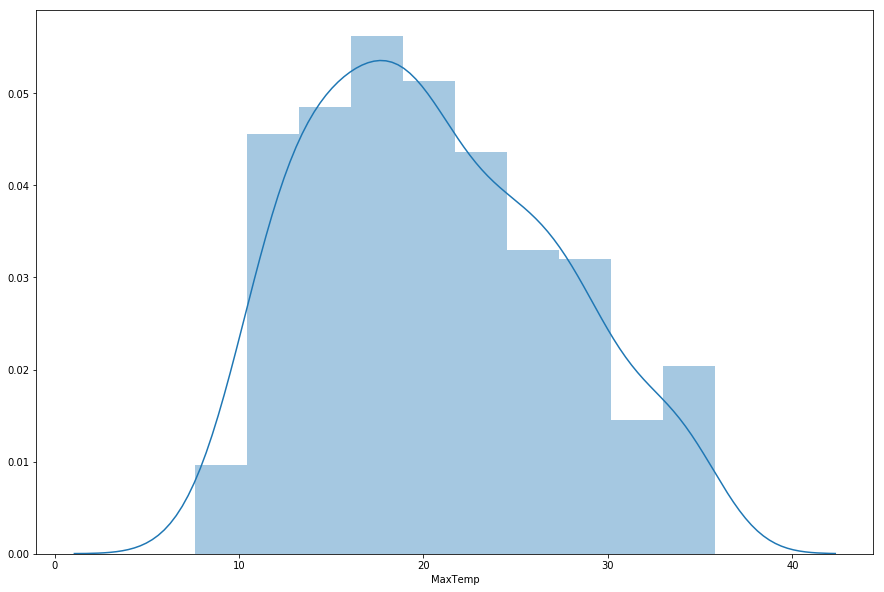

In [18]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['MaxTemp'])
plt.show()

In [19]:
X= dataset['MinTemp'].values.reshape(-1,1)
y= dataset['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [20]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print('Intercept is :',model.intercept_)

Intercept is : [14.56202411]


In [22]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[0.81953755]]


In [23]:
y_pred= model.predict(X_test)

In [24]:
df=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

    Actual  Predicted
0     25.2  23.413030
1     11.5  13.086857
2     21.1  27.264856
3     22.2  25.461874
4     20.4  26.937041
5     26.1  20.052926
6     34.9  29.313700
7     16.7  13.824440
8     14.3  17.430406
9     18.2  19.561203
10    18.4  20.872463
11    14.8  25.216012
12    11.6  16.446960
13    12.2  16.446960
14    17.3  13.332718
15    17.5  16.365007
16    14.1  16.528914
17    23.1  22.019816
18    16.3  20.626602
19    29.3  23.986706
20    19.6  24.068660
21    14.1  18.086036
22    35.0  27.182902
23    14.0  14.562024
24    16.2  14.398117
25    11.1  12.431226
26    30.3  28.084394
27    24.3  26.363365
28    28.6  24.970151
29    20.9  15.791330
..     ...        ...
44    33.4  27.100949
45    14.8  17.922128
46    14.0  15.053747
47    15.7  18.331897
48    14.8  13.332718
49    27.5  24.478428
50    18.9  19.151434
51    14.5  18.086036
52    12.9  15.299608
53    19.8  20.380741
54    23.8  27.674625
55    26.3  22.593492
56    20.4  22.101770
57    35.2

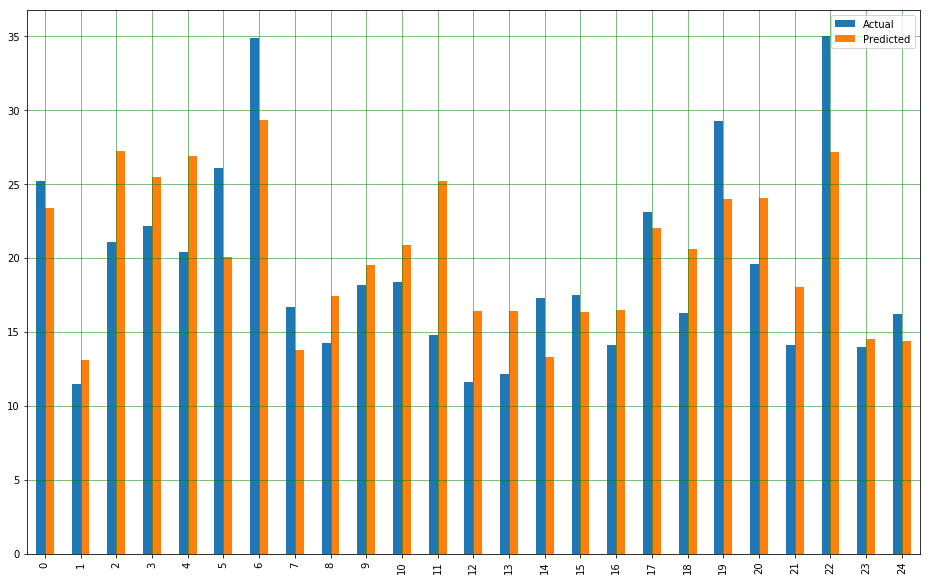

In [25]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

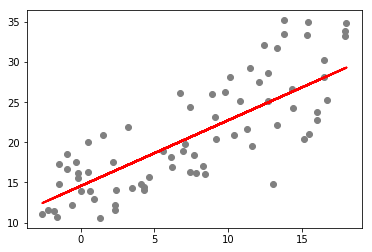

In [26]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [27]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error is:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean abolute error is: 3.5094353112899594
Mean squared error is: 17.011877668640622
Root mean squared error is: 4.124545753006096
